In [1]:
#importing the libraries
import numpy as np
from  matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('/content/kaggle_train.csv')
test_df = pd.read_csv('/content/kaggle_test.csv')

In [3]:
# Numerical Columns
numerical_cols = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay"
]
# Categorical Columns
categorical_cols = [
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
    "Month",
]

# Exploratory Data Analysis

## Understanding the Dataset

In [4]:
train_df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9758,0,0.000000,0,0.0,28,447.000000,0.000000,0.033333,0.0,0.0,Nov,2,2,7,10,Returning_Visitor,False,False
97,5,85.166667,1,8.0,95,3715.777564,0.010101,0.011852,0.0,0.0,Jul,2,4,4,1,Returning_Visitor,False,False
8577,0,0.000000,0,0.0,25,1229.250000,0.025333,0.038133,0.0,1.0,May,3,2,3,4,Returning_Visitor,True,False
11052,7,87.250000,4,199.5,87,4984.542857,0.003261,0.021130,0.0,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
9038,1,115.000000,0,0.0,19,1383.191667,0.010000,0.019167,0.0,0.0,May,1,1,1,3,Returning_Visitor,False,False


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  float64
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [6]:
#checking the datatypes of the datase
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,15.0,1,157.0,36,3010.532051,0.000000,0.014620,0.0,0.0,May,2,2,3,2,Returning_Visitor,True,False
1,0,0.0,0,0.0,57,820.363636,0.035088,0.061651,0.0,0.0,June,3,2,3,13,Returning_Visitor,False,False
2,9,228.2,1,0.0,7,186.400000,0.020000,0.030000,0.0,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
3,3,72.6,0,0.0,17,544.100000,0.000000,0.002000,0.0,0.0,Sep,2,2,9,2,New_Visitor,False,False
4,0,0.0,4,8.0,66,1514.836310,0.022887,0.044914,0.0,0.0,Dec,2,2,6,2,Returning_Visitor,False,False


In [7]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000
mean,2.311886,81.118365,0.509777,34.867509,31.715419,1194.757649,0.021933,0.042813,5.860658,0.061278,2.120843,2.354060,3.146796,4.072182
std,3.317760,178.842997,1.277939,141.664660,44.192612,1908.767956,0.048070,0.048270,18.496266,0.198846,0.914069,1.718938,2.410359,4.036303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,601.971429,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.300000,0.000000,0.000000,38.000000,1466.088462,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
# Count number of zeros in each numerical column
zero_counts = train_df[numerical_cols].apply(lambda col: (col == 0).sum())

# Display the count of zeros
print("Number of zeros in each numerical column:")
print(zero_counts)


Number of zeros in each numerical column:
Administrative             5171
Administrative_Duration    5297
Informational              8703
Informational_Duration     8907
ProductRelated               32
ProductRelated_Duration     665
BounceRates                4992
ExitRates                    67
PageValues                 8659
SpecialDay                 9979
dtype: int64


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  float64
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [10]:
missing_values = train_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## Trying Feature Selection

In [11]:
excluded_cols = ['ProductRelated', 'ProductRelated_Duration', 'ExitRates','BounceRates']

In [12]:
import numpy as np
import pandas as pd


# Dictionary to store bin sizes for each feature
bin_sizes = {}

# Step 1: Calculate bin sizes based on training data
for col in numerical_cols:
  if col not in excluded_cols:
    max_value = train_df[col].max()
    bin_size = max_value / 10  # Divide into 10 bins
    bin_sizes[col] = bin_size

# Step 2: Function to bin values based on precomputed bin size
def bin_value(val, bin_size):
    return min(10, np.ceil(val / bin_size).astype(int))

# Step 3: Apply binning to train and test data
for col in numerical_cols:
    if col not in excluded_cols:
      train_df[col ]= train_df[col].apply(lambda x: bin_value(x, bin_sizes[col]))
      test_df[col] = test_df[col].apply(lambda x: bin_value(x, bin_sizes[col]))

print(bin_sizes)


{'Administrative': 2.7, 'Administrative_Duration': 339.875, 'Informational': 2.4, 'Informational_Duration': 254.9375, 'PageValues': 36.176374190000004, 'SpecialDay': 0.1}


In [13]:
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,36,3010.532051,0.000000,0.014620,0,0,May,2,2,3,2,Returning_Visitor,True,False
1,0,0,0,0,57,820.363636,0.035088,0.061651,0,0,June,3,2,3,13,Returning_Visitor,False,False
2,4,1,1,0,7,186.400000,0.020000,0.030000,0,0,Nov,2,2,1,20,Returning_Visitor,False,False
3,2,1,0,0,17,544.100000,0.000000,0.002000,0,0,Sep,2,2,9,2,New_Visitor,False,False
4,0,0,2,1,66,1514.836310,0.022887,0.044914,0,0,Dec,2,2,6,2,Returning_Visitor,False,False


In [14]:
train_df.nunique()

,0
Administrative,11
Administrative_Duration,11
Informational,9
Informational_Duration,11
ProductRelated,300
ProductRelated_Duration,8697
BounceRates,1745
ExitRates,4371
PageValues,10
SpecialDay,6


## Feature Distribution Visualisation

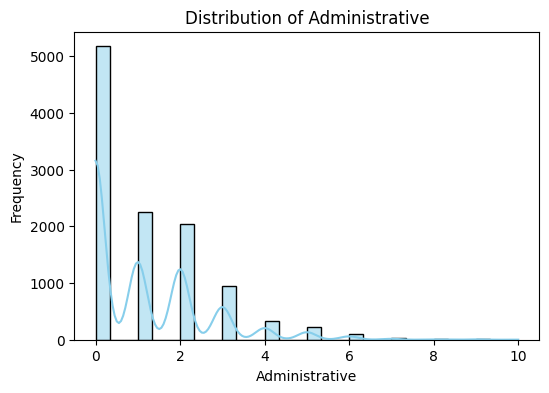

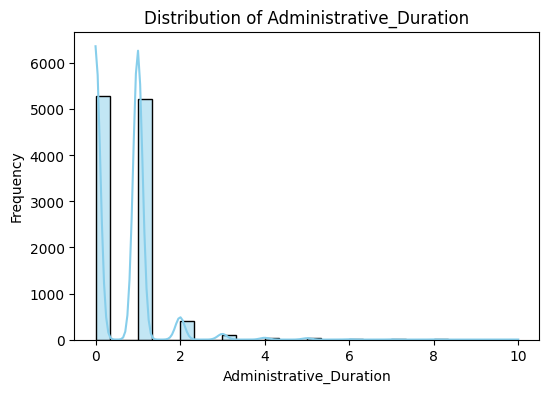

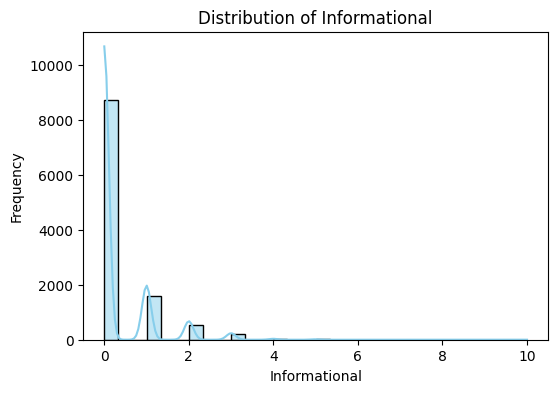

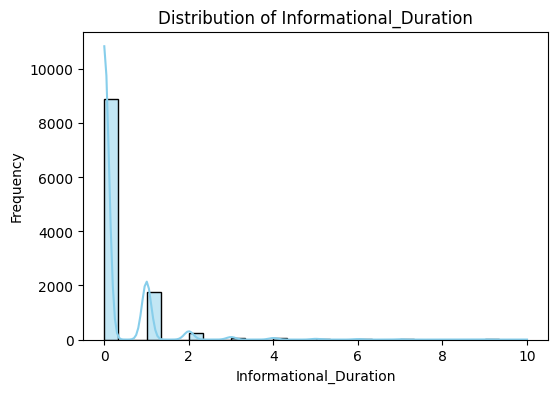

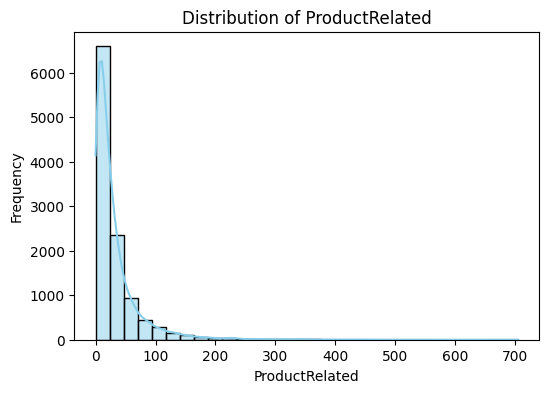

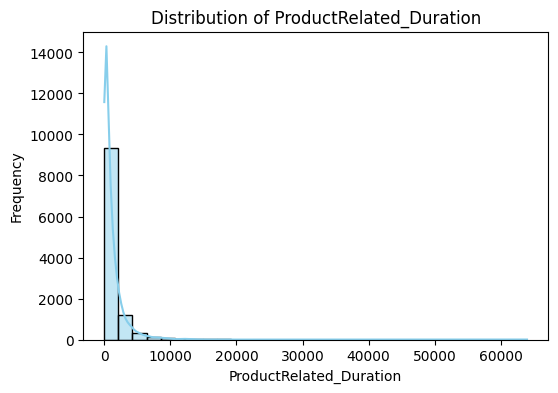

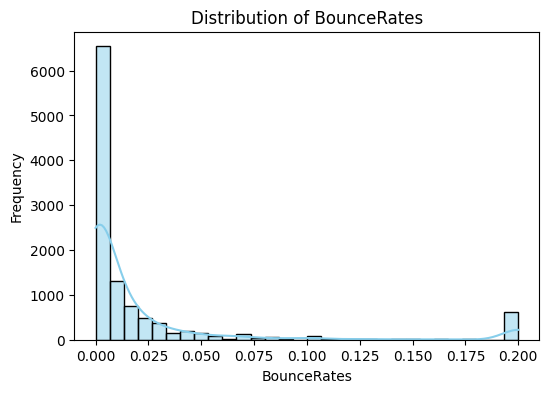

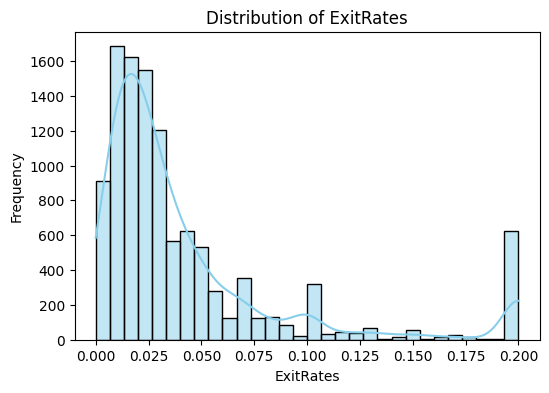

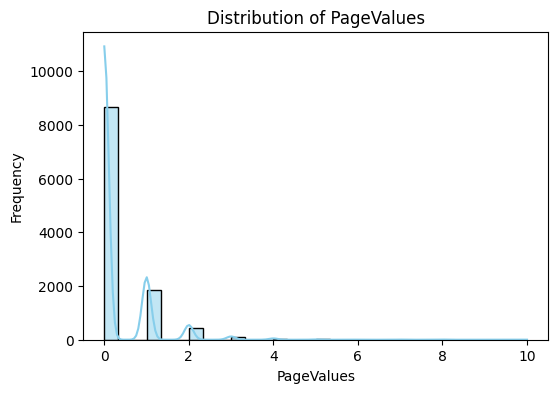

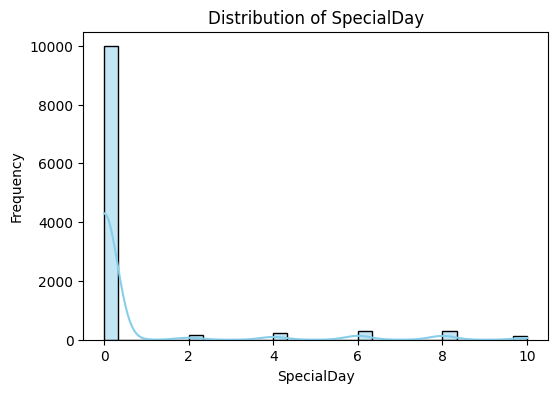

In [15]:
# plot histograms for numerical variables and count plots for categorical variables

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
df = train_df
# Condition 1: Administrative > 5
admin_revenue_true = df[df['Administrative']>5 ]['Revenue'].sum()
print(f"Revenue=True when Administrative > 5: {admin_revenue_true}")

# Condition 2: Administrative_Duration > 500
admin_dur_revenue_true = df[df['Administrative_Duration'] > 500]['Revenue'].sum()
print(f"Revenue=True when Administrative_Duration > 500: {admin_dur_revenue_true}")

# Condition 3: Informational > 5
info_revenue_true = df[df['Informational'] > 5]['Revenue'].sum()
print(f"Revenue=True when Informational > 5: {info_revenue_true}")

# Condition 4: Informational_Duration > 200
info_dur_revenue_true = df[df['Informational_Duration'] > 200]['Revenue'].sum()
print(f"Revenue=True when Informational_Duration > 200: {info_dur_revenue_true}")

# Condition 5: PageValues > 100
page_value_revenue_true = df[df['PageValues'] > 100]['Revenue'].sum()
print(f"Revenue=True when PageValues > 100: {page_value_revenue_true}")


Revenue=True when Administrative > 5: 33
Revenue=True when Administrative_Duration > 500: 0
Revenue=True when Informational > 5: 0
Revenue=True when Informational_Duration > 200: 0
Revenue=True when PageValues > 100: 0


In [17]:
train_df.nunique()

,0
Administrative,11
Administrative_Duration,11
Informational,9
Informational_Duration,11
ProductRelated,300
ProductRelated_Duration,8697
BounceRates,1745
ExitRates,4371
PageValues,10
SpecialDay,6


<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


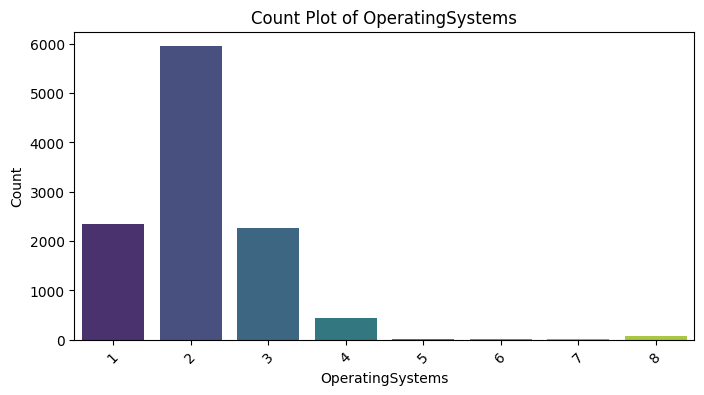

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


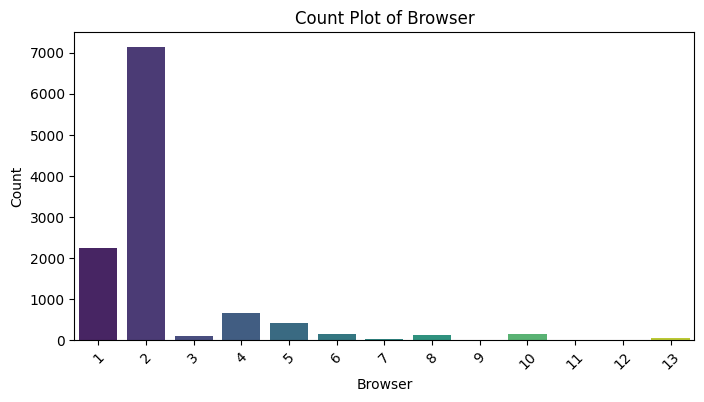

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


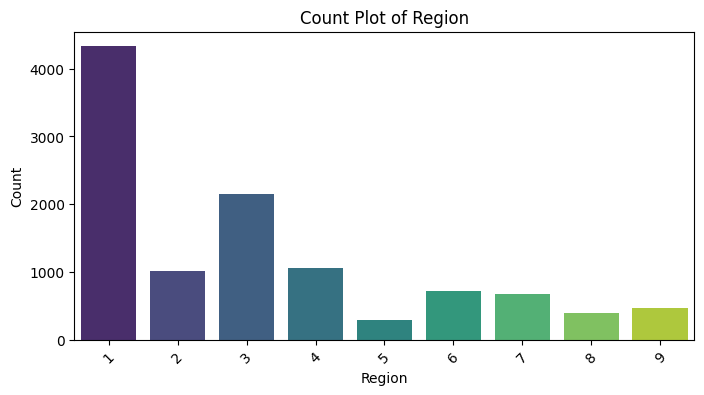

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


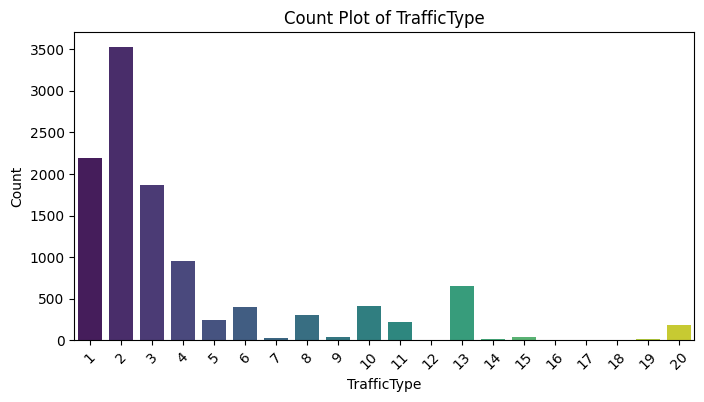

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


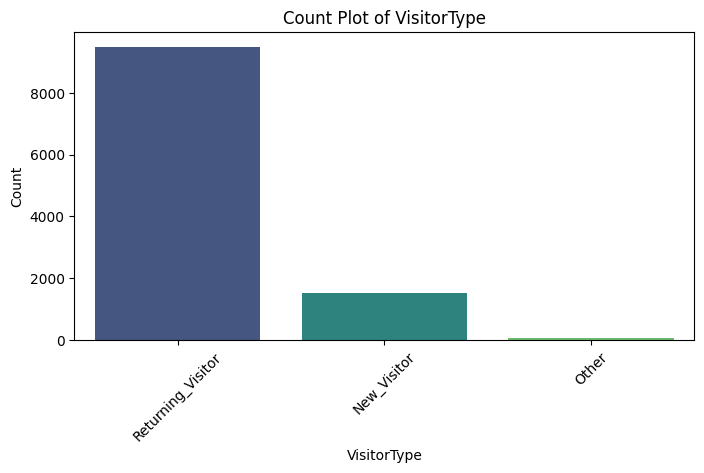

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


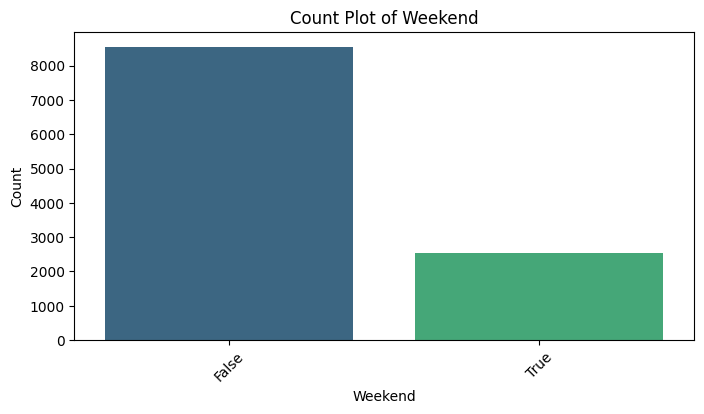

<ipython-input-18-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


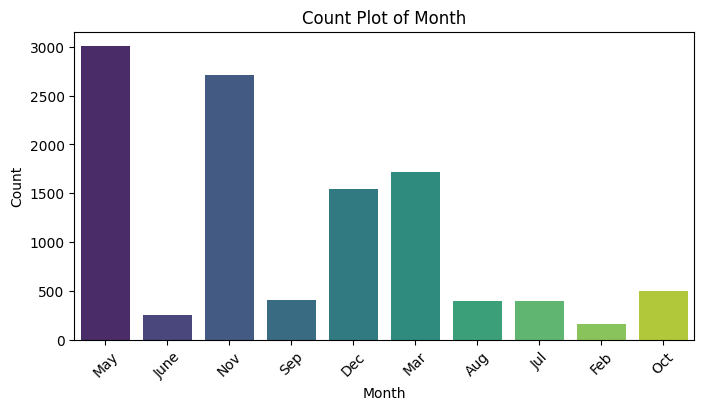

In [18]:
# Plot count plots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## One hot encoding


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  int64  
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  int64  
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  int64  
 9   SpecialDay               11097 non-null  int64  
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [20]:
from sklearn.preprocessing import OneHotEncoder
# 1. Fit the encoder on the training data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # handle_unknown='ignore' prevents errors with unseen categories
encoder.fit(train_df[categorical_cols])

# 2. Transform both training and test datasets using the same encoder
encoded_train_data = encoder.transform(train_df[categorical_cols])
encoded_test_data = encoder.transform(test_df[categorical_cols])

# Convert encoded data to DataFrames
encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns in original DataFrames
train_df = pd.concat([train_df.drop(columns=categorical_cols), encoded_train_df], axis=1)
test_df = pd.concat([test_df.drop(columns=categorical_cols), encoded_test_df], axis=1)


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 11097 non-null  int64  
 1   Administrative_Duration        11097 non-null  int64  
 2   Informational                  11097 non-null  int64  
 3   Informational_Duration         11097 non-null  int64  
 4   ProductRelated                 11097 non-null  int64  
 5   ProductRelated_Duration        11097 non-null  float64
 6   BounceRates                    11097 non-null  float64
 7   ExitRates                      11097 non-null  float64
 8   PageValues                     11097 non-null  int64  
 9   SpecialDay                     11097 non-null  int64  
 10  Revenue                        11097 non-null  bool   
 11  OperatingSystems_1             11097 non-null  float64
 12  OperatingSystems_2             11097 non-null 

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1233 non-null   int64  
 1   Administrative                 1233 non-null   int64  
 2   Administrative_Duration        1233 non-null   int64  
 3   Informational                  1233 non-null   int64  
 4   Informational_Duration         1233 non-null   int64  
 5   ProductRelated                 1233 non-null   int64  
 6   ProductRelated_Duration        1233 non-null   float64
 7   BounceRates                    1233 non-null   float64
 8   ExitRates                      1233 non-null   float64
 9   PageValues                     1233 non-null   int64  
 10  SpecialDay                     1233 non-null   int64  
 11  OperatingSystems_1             1233 non-null   float64
 12  OperatingSystems_2             1233 non-null   f

# Feature Engineering & Selection

In [23]:
import pandas as pd
import numpy as np

# Correlation matrix
corr_matrix = train_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns = to_drop)

print(f"Dropped highly correlated features: {to_drop}")

numerical_cols = [col for col in numerical_cols if col not in to_drop]
excluded_cols = [col for col in excluded_cols if col not in to_drop]


Dropped highly correlated features: ['ProductRelated_Duration', 'ExitRates', 'Browser_1', 'Browser_11', 'VisitorType_Returning_Visitor', 'Weekend_True']


In [24]:
print(train_df.shape)
print(test_df.shape)

(11097, 70)
(1233, 70)


In [25]:
print(train_df['Revenue'].value_counts())


Revenue
False    9392
True     1705
Name: count, dtype: int64


In [26]:
# from imblearn.over_sampling import SMOTE


# X = train_df.drop('Revenue', axis=1)
# y = train_df['Revenue']

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")


In [27]:
# print(X_resampled.shape)
# print(y_resampled.shape)


In [28]:
# train_df = pd.concat([X_resampled, y_resampled], axis=1)

In [29]:
split_point = int(0.8 * len(train_df))
train_train_df = train_df[:split_point]
train_test_df = train_df[split_point:]

In [30]:
print(train_train_df.shape)
print(train_test_df.shape)

(8877, 70)
(2220, 70)


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  int64  
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  int64  
 4   ProductRelated           11097 non-null  int64  
 5   BounceRates              11097 non-null  float64
 6   PageValues               11097 non-null  int64  
 7   SpecialDay               11097 non-null  int64  
 8   Revenue                  11097 non-null  bool   
 9   OperatingSystems_1       11097 non-null  float64
 10  OperatingSystems_2       11097 non-null  float64
 11  OperatingSystems_3       11097 non-null  float64
 12  OperatingSystems_4       11097 non-null  float64
 13  OperatingSystems_5       11097 non-null  float64
 14  OperatingSystems_6    

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train_train_df[excluded_cols] = scalar.fit_transform(train_train_df[excluded_cols])
train_test_df[excluded_cols] = scalar.transform(train_test_df[excluded_cols])
test_df[excluded_cols] = scalar.transform(test_df[excluded_cols])
train_df[excluded_cols] = scalar.transform(train_df[excluded_cols])


<ipython-input-32-097e99abac03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train_df[excluded_cols] = scalar.fit_transform(train_train_df[excluded_cols])
<ipython-input-32-097e99abac03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_df[excluded_cols] = scalar.transform(train_test_df[excluded_cols])


In [33]:
train_train_df['Revenue'] = train_train_df['Revenue'].astype(int)
train_test_df['Revenue'] = train_test_df['Revenue'].astype(int)

<ipython-input-33-684275fc0acd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train_df['Revenue'] = train_train_df['Revenue'].astype(int)
<ipython-input-33-684275fc0acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_df['Revenue'] = train_test_df['Revenue'].astype(int)


In [34]:
X_train = train_train_df.drop(columns=['Revenue'])
y_train = train_train_df['Revenue']
X_test = train_test_df.drop(columns=['Revenue'])
y_test = train_test_df['Revenue']

Logistic Regression Results:
Accuracy: 0.8514
Precision: 0.5100
Recall: 0.8240
F1 Score: 0.6300
--------------------------------------------------


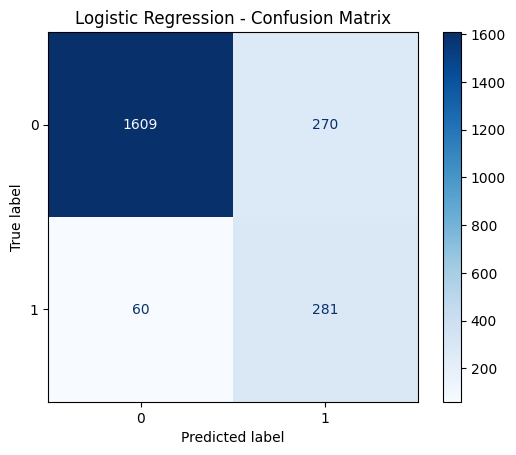

SVC Results:
Accuracy: 0.8698
Precision: 0.5514
Recall: 0.8182
F1 Score: 0.6588
--------------------------------------------------


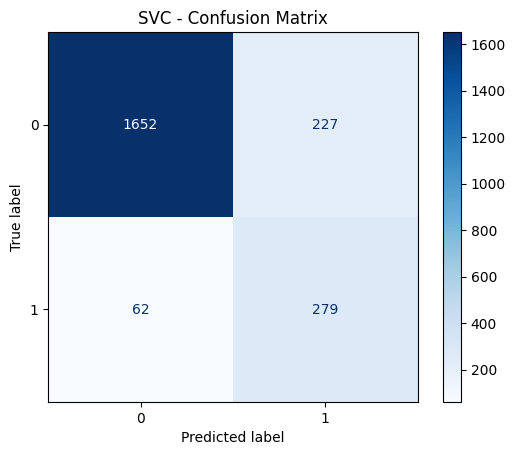

Decision Tree Results:
Accuracy: 0.8716
Precision: 0.5782
Recall: 0.6070
F1 Score: 0.5923
--------------------------------------------------


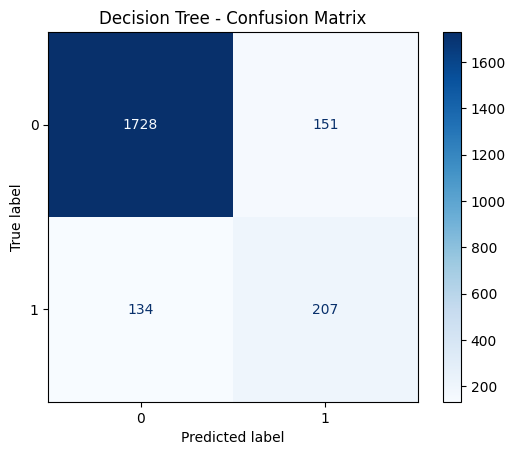

Bagging Classifier Results:
Accuracy: 0.8991
Precision: 0.7224
Recall: 0.5572
F1 Score: 0.6291
--------------------------------------------------


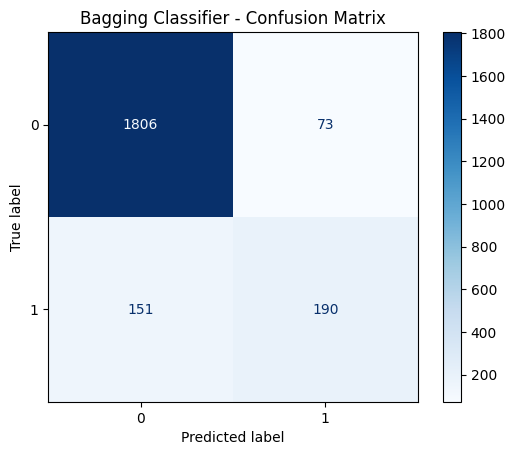

Random Forest Results:
Accuracy: 0.8995
Precision: 0.7418
Recall: 0.5308
F1 Score: 0.6188
--------------------------------------------------


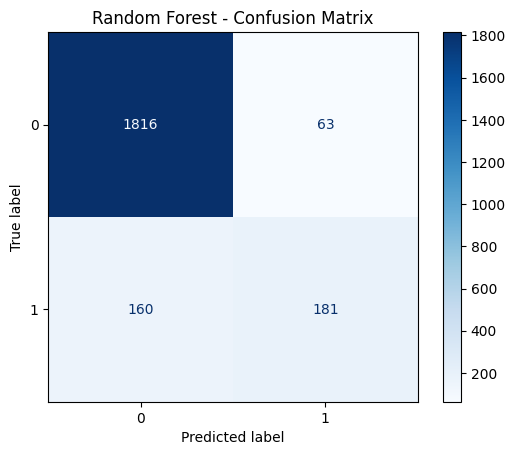

Gradient Boosting Results:
Accuracy: 0.9050
Precision: 0.7305
Recall: 0.6041
F1 Score: 0.6613
--------------------------------------------------


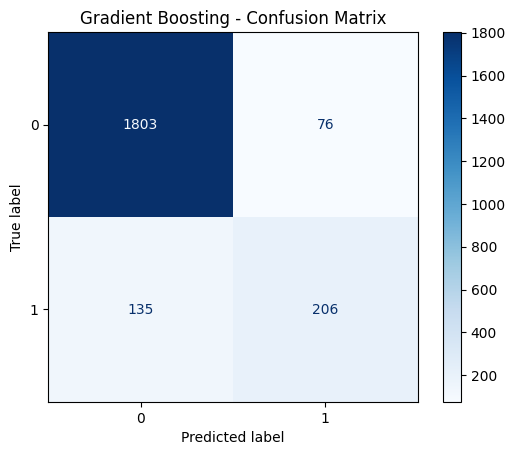

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=10000, penalty=None, class_weight='balanced')
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# 2. Support Vector Classifier (SVC)
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

# 3. Decision Tree Classifier
dtc = DecisionTreeClassifier(class_weight='balanced')  
dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)

# 4. Bagging Classifier (with Decision Trees)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_test)


# 5. Random Forest Classifier (Advanced Bagging)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# 6. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)


def evaluate_model(y_true, predictions, model_name):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, zero_division=0)
    recall = recall_score(y_true, predictions, zero_division=0)
    f1 = f1_score(y_true, predictions, zero_division=0)

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print('-' * 50)

def display_confusion_matrix(y_true, predictions, model_name):
    cm = confusion_matrix(y_true, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

models = {
    "Logistic Regression": log_reg_predictions,
    "SVC": svc_predictions,
    "Decision Tree": dtc_predictions,
    "Bagging Classifier": bagging_predictions,
    "Random Forest": rf_predictions,
    "Gradient Boosting": gb_predictions
}



# Evaluate all models
for model_name, predictions in models.items():
    evaluate_model(y_test, predictions, model_name)
    display_confusion_matrix(y_test, predictions, model_name)


In [36]:
test_df_t = test_df.drop(columns=['id'])

In [37]:
y_out1 = log_reg.predict(test_df_t)
y_out2 = svc.predict(test_df_t)
y_out3 = dtc.predict(test_df_t)
y_out4 = bagging.predict(test_df_t)
y_out5 = rf.predict(test_df_t)
y_out6 = gb.predict(test_df_t)

In [38]:
print(np.sum(y_out1))
print(np.sum(y_out2))
print(np.sum(y_out3))
print(np.sum(y_out4))
print(np.sum(y_out5))
print(np.sum(y_out6))


304
292
205
148
130
155


In [44]:
# Load Kaggle test dataset and keep only the 'id' column
kaggle_output_df = pd.read_csv("/content/kaggle_test.csv")
kaggle_output_df = kaggle_output_df[['id']]

# Create output DataFrame with 'id' and 'Revenue'
output_col = pd.DataFrame({'id': test_df['id'], 'Revenue': y_out2})

# Merge on 'id' to avoid duplicate columns
kaggle_output_df = pd.merge(kaggle_output_df, output_col, on='id', how='left')

# Display the first 15 rows to verify
print(kaggle_output_df.head(15))

# Save the DataFrame as a CSV file
kaggle_output_df.to_csv('kaggle_val.csv', index=False)


    id  Revenue
0    0        0
1    1        1
2    2        1
3    3        1
4    4        1
5    5        0
6    6        0
7    7        0
8    8        1
9    9        0
10  10        0
11  11        0
12  12        0
13  13        0
14  14        0
